In [29]:

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy
plt.style.use('dark_background')

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from pandas import read_csv, DataFrame, DatetimeIndex, date_range, Timestamp
from pandas.tseries.offsets import MonthBegin, MonthEnd

In [3]:

data = read_csv("data\Electric_Production.csv", header=0, index_col=0, parse_dates=True, date_format="%m/%d/%Y")

organized_data = DataFrame()
#organized_data["year"] = DatetimeIndex(data.index).year
#organized_data["month"] =  DatetimeIndex(data.index).month
organized_data["production"] = data["IPG2211A2N"].values
organized_data.index = data.index

data = organized_data
data

,production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137


<Axes: ylabel='Density'>

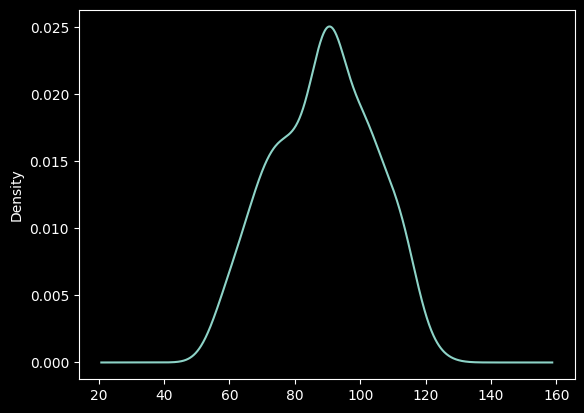

In [4]:
data.production.plot(kind="kde")

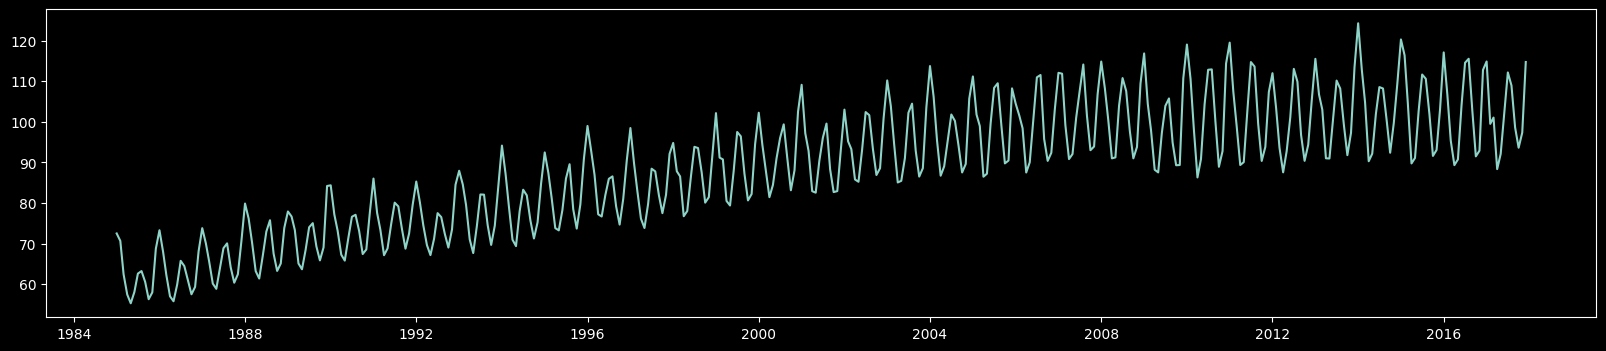

In [5]:

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(data.production)

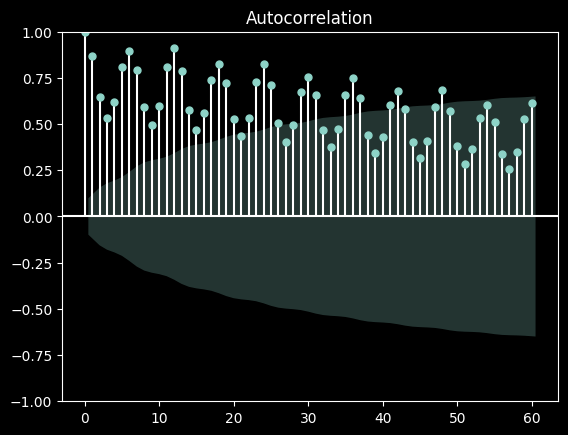

In [6]:
sm.graphics.tsa.plot_acf(data.production.values.squeeze(), lags=60)
plt.show()

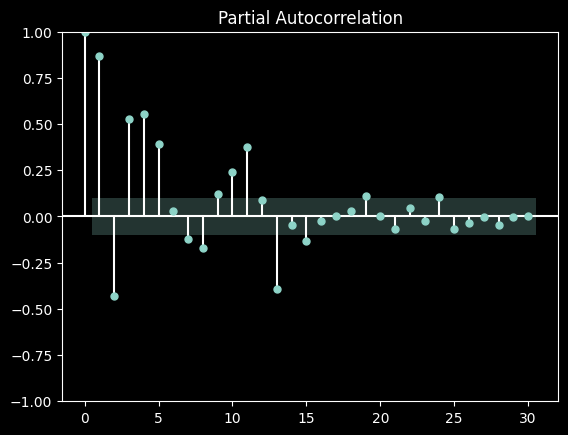

In [7]:
sm.graphics.tsa.plot_pacf(data.production.values.squeeze(), lags=30)
plt.show()

In [8]:
windows = data.production.rolling(60, center=True)

moving_averages = windows.mean()

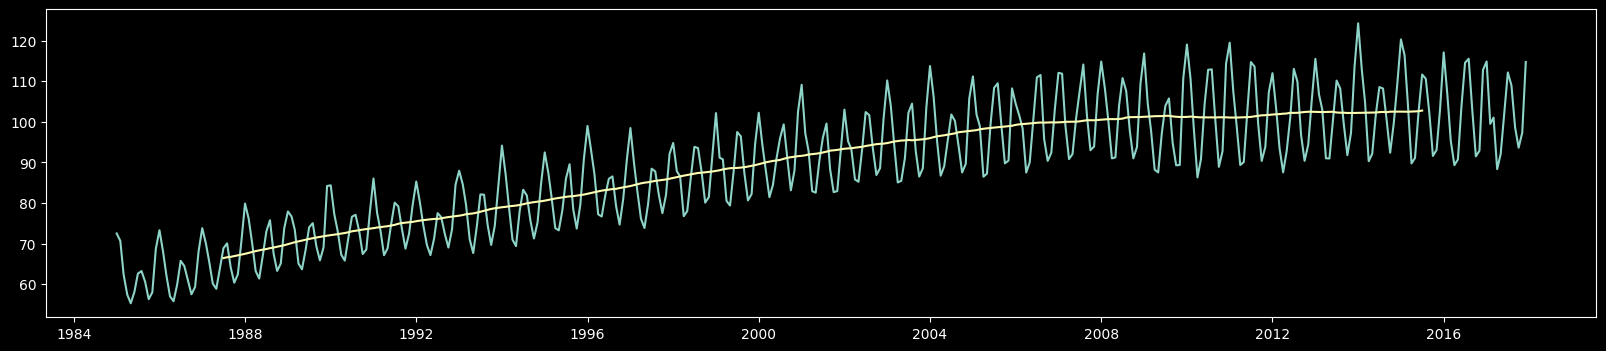

In [9]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(data.production)
plt.plot(moving_averages)

In [10]:
exponential_moving_average = data.production.ewm(com=50.0).mean()

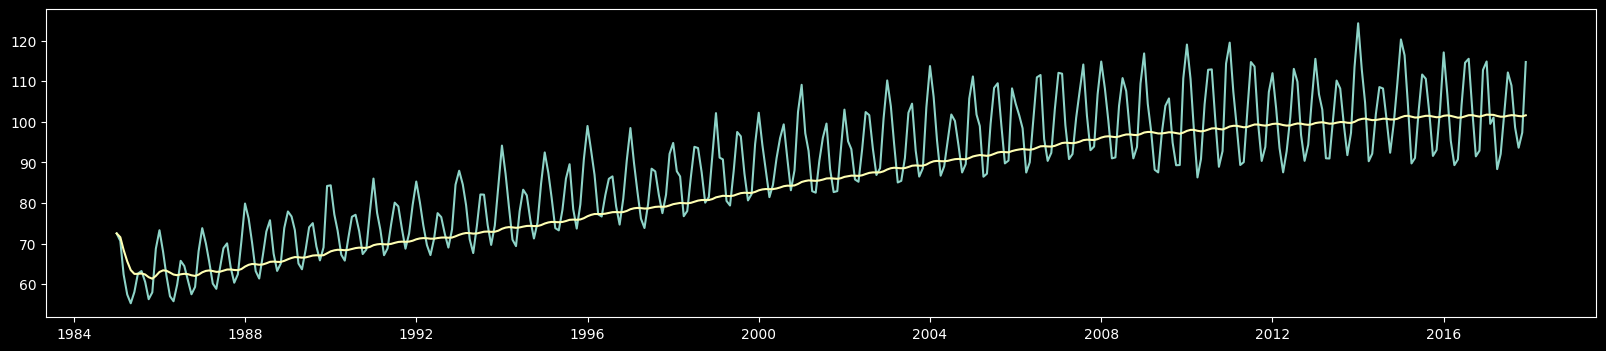

In [11]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

plt.plot(data.production)
plt.plot(exponential_moving_average)

In [14]:
model = ARIMA(data.production.values, order=(15,2,20))
model_fit = model.fit()
output = model_fit.forecast(steps=12*5)


d:\ivanush\learning\Time Series Analisys\Practice\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:

prediction = DataFrame()
prediction["production"] = output


prediction.index = dr=date_range(Timestamp(2018,1,1), Timestamp(2022,12,1), name='Date', freq='1MS')

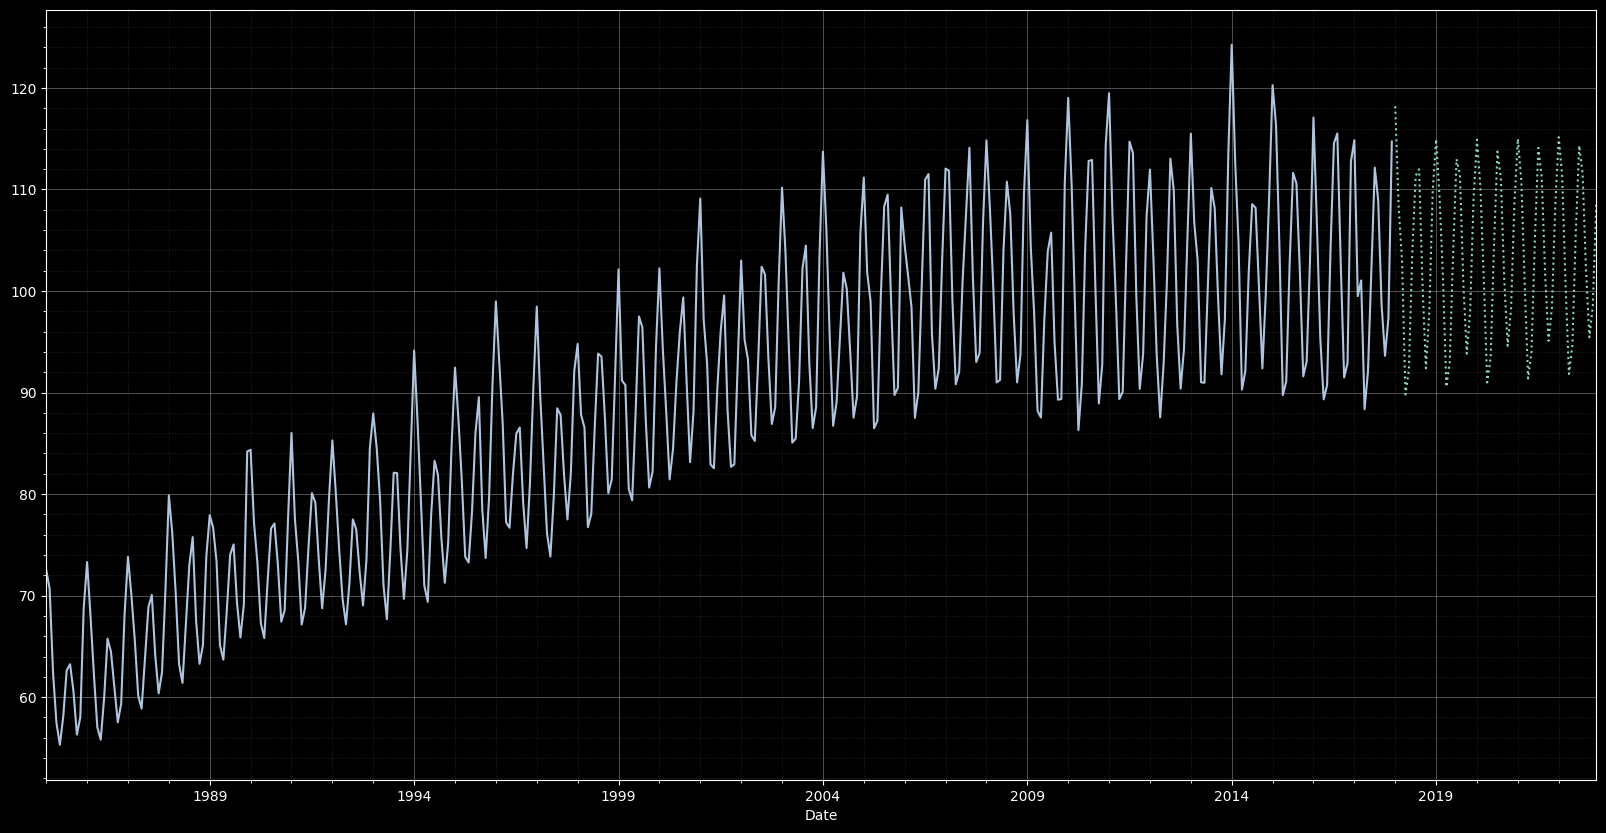

In [37]:
fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(10)


ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.grid(True)
ax.minorticks_on()

data.production.plot(color="lightsteelblue")
prediction.production.plot(style=":")

ax.grid(which='major', color='#DDDDDD', linewidth=0.5, alpha=0.5)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5,alpha=0.2)

